## Learning Exercise II-B
Let's solve a 4-Lights Out problem with qRAM.  

When the initial board state lightsout4=\[\[Board 0\],\[Board 1\],\[Board 2\],\[Board 3\]\] is described by the following data, 
determine the _binary_ number of the solvable boards in $3$ switch operations.  (ex. Board 0 → 00, 1 → 01, 2 → 10, 3 → 11)

Answer by creating a quantum circuit to solve the puzzle shown in the figure below. In the quantum circuit to be submitted, measure only the `solution` (2bit) that solves the puzzle.

To submit your solution, create a function which takes "lightsout4" as an input and returns `QuantumCircuit`.  You can choose a function name you like. Make sure it works even if you input another dataset to "lightsout4".

 **In addition, please implement the quantum circuit within 28 qubits.**

Please note that you can get the answer with the same endian as the one used in the description. You can also use the following function.
```python
qc = qc.reverse_bits()
```

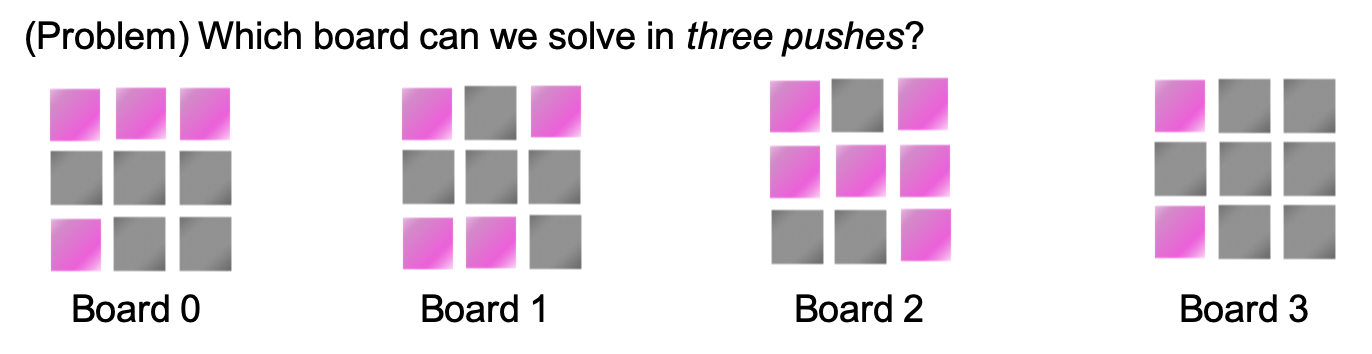

In [8]:
Image('4lightsout_pr.png')

In [9]:
lightsout4=[[1, 1, 1, 0, 0, 0, 1, 0, 0],[1, 0, 1, 0, 0, 0, 1, 1, 0],[1, 0, 1, 1, 1, 1, 0, 0, 1],[1, 0, 0, 0, 0, 0, 1, 0, 0]]

### Hints
- Change the oracle of [qRAM data search](#qRAM-Data-search) to an appropriate one.
- Data storing/writing in *QRAM operation* can be performed in any order. We can reduce the number of gates by taking into account the _hamming distance_ of the address and input data.

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# Importing Qiskit
from qiskit import IBMQ, BasicAer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute

# Import basic plot tools
from qiskit.tools.visualization import plot_histogram

backend = BasicAer.get_backend('qasm_simulator')
prob_of_ans = []
def week2b_ans_func(lightout4):    
    def initialize(qc, address, push, oracle, flag, lightout4):
        qc.h(address)
        qc.h(push)

        qc.x(oracle)
        qc.h(oracle)
        
        qc.x(flag)
        qc.h(flag)        

        qc.barrier()

    def qram_c(lightout4):
        address = QuantumRegister(2, name='address')
        light = QuantumRegister(9, name='light')
        qc = QuantumCircuit(address, light)

        board = lightout4[0]

        qc.x([address[0],address[1]])
        for i in range(len(board)):
            if board[i] == 1:
                qc.ccx(address[0],address[1], light[i])
        qc.x([address[0],address[1]])

        # board 2
        board = lightout4[1]

        qc.x(address[0])
        for i in range(len(board)):
            if board[i] == 1:
                qc.ccx(address[0],address[1], light[i])
        qc.x(address[0])

        # board 3
        board = lightout4[2]

        qc.x(address[1])
        for i in range(len(board)):
            if board[i] == 1:
                qc.ccx(address[0],address[1], light[i])
        qc.x(address[1])

        # board 4
        board = lightout4[3]

        for i in range(len(board)):
            if board[i] == 1:
                qc.ccx(address[0],address[1], light[i])

        return qc

    def qram_rev_c(lightout4):
        address = QuantumRegister(2, name='address')
        light = QuantumRegister(9, name='light')
        qc = QuantumCircuit(address, light)

        # board 4
        board = lightout4[3]

        for i in range(len(board)):
            if board[i] == 1:
                qc.ccx(address[0],address[1], light[i])
                
        # board 3
        board = lightout4[2]

        qc.x(address[1])
        for i in range(len(board)):
            if board[i] == 1:
                qc.ccx(address[0],address[1], light[i])
        qc.x(address[1])
        
         # board 2
        board = lightout4[1]

        qc.x(address[0])
        for i in range(len(board)):
            if board[i] == 1:
                qc.ccx(address[0],address[1], light[i])
        qc.x(address[0])       
        
        # board 1
        board = lightout4[0]

        qc.x([address[0],address[1]])
        for i in range(len(board)):
            if board[i] == 1:
                qc.ccx(address[0],address[1], light[i])
        qc.x([address[0],address[1]])

        return qc

    def grover_oracle_c():
        def entangle(qc, flip, light):
            qc.cx(flip[0], light[0])
            qc.cx(flip[0], light[1])
            qc.cx(flip[0], light[3])

            qc.cx(flip[1], light[0])
            qc.cx(flip[1], light[1])
            qc.cx(flip[1], light[2])
            qc.cx(flip[1], light[4])

            qc.cx(flip[2], light[1])
            qc.cx(flip[2], light[2])
            qc.cx(flip[2], light[5])

            qc.cx(flip[3], light[0])
            qc.cx(flip[3], light[3])
            qc.cx(flip[3], light[4])
            qc.cx(flip[3], light[6])

            qc.cx(flip[4], light[1])
            qc.cx(flip[4], light[3])
            qc.cx(flip[4], light[4])
            qc.cx(flip[4], light[5])
            qc.cx(flip[4], light[7])

            qc.cx(flip[5], light[2])
            qc.cx(flip[5], light[4])
            qc.cx(flip[5], light[5])
            qc.cx(flip[5], light[8])

            qc.cx(flip[6], light[3])
            qc.cx(flip[6], light[6])
            qc.cx(flip[6], light[7])

            qc.cx(flip[7], light[4])
            qc.cx(flip[7], light[6])
            qc.cx(flip[7], light[7])
            qc.cx(flip[7], light[8])

            qc.cx(flip[8], light[5])
            qc.cx(flip[8], light[7])
            qc.cx(flip[8], light[8])
    
        light = QuantumRegister(9, name='light')
        flip = QuantumRegister(9, name='flip')
        oracle = QuantumRegister(1, name='oracle')

        qc = QuantumCircuit(light, flip, oracle)

        entangle(qc, flip, light)

        qc.x(light)
        qc.mct(light, oracle)
        qc.x(light)

        entangle(qc, flip, light)

        return qc

    def grover_diffusion_c():
        flip = QuantumRegister(9, name='flip')
        qc = QuantumCircuit(flip)

        qc.h(flip)
        qc.x(flip)
        qc.h(flip[8])
        qc.mct(flip[0:8], flip[8])
        qc.h(flip[8])
        qc.x(flip)
        qc.h(flip)

        return qc

    def counter_c():
        flip = QuantumRegister(9, name='flip')
        auxiliary = QuantumRegister(4, name='auxiliary')
        qc = QuantumCircuit(flip, auxiliary)

        for i in range(len(flip)):
            qc.mct([flip[i], auxiliary[0], auxiliary[1], auxiliary[2]], auxiliary[3], mode='noancilla')
            qc.mct([flip[i], auxiliary[0], auxiliary[1]], auxiliary[2], mode='noancilla')
            qc.ccx(flip[i], auxiliary[0], auxiliary[1])
            qc.cx(flip[i], auxiliary[0])

        return qc
    
    def counter_rev_c():
        flip = QuantumRegister(9, name='flip')
        auxiliary = QuantumRegister(4, name='auxiliary')
        qc = QuantumCircuit(flip, auxiliary)
        
        for i in range(len(flip)):
            qc.cx(flip[i],auxiliary[0])
            qc.ccx(flip[i],auxiliary[0],auxiliary[1])
            qc.mct([flip[i],auxiliary[0],auxiliary[1]],auxiliary[2],mode='noancilla')
            qc.mct([flip[i],auxiliary[0],auxiliary[1],auxiliary[2]],auxiliary[3],mode='noancilla')
        
        return qc
    
    def counter_rev2_c():
        flip = QuantumRegister(9, name='flip')
        auxiliary = QuantumRegister(4, name='auxiliary')
        qc = QuantumCircuit(flip, auxiliary)
        
        for i in reversed(range(len(flip))):
            qc.mct([flip[i], auxiliary[0], auxiliary[1], auxiliary[2]], auxiliary[3], mode='noancilla')
            qc.mct([flip[i], auxiliary[0], auxiliary[1]], auxiliary[2], mode='noancilla')
            qc.ccx(flip[i], auxiliary[0], auxiliary[1])
            qc.cx(flip[i], auxiliary[0])
        
        return qc

    def inverts_phase_c():
        auxiliary = QuantumRegister(4, name='auxiliary')
        flag = QuantumRegister(1, name='flag')

        qc = QuantumCircuit(auxiliary, flag)

        qc.x(auxiliary[2])
        qc.x(auxiliary[3])
        qc.ccx(auxiliary[2], auxiliary[3], flag)
        qc.x(auxiliary[2])
        qc.x(auxiliary[3])

        return qc

    def diffusion_c():
        address = QuantumRegister(2, name='address')
        qc = QuantumCircuit(address)

        qc.h(address[:2])
        qc.x(address[:2])
        qc.h(address[1])
        qc.cx(address[0], address[1])
        qc.h(address[1])
        qc.x(address[:2])
        qc.h(address[:2])

        return qc

    def measure(qc, address, cbits):
        qc.measure(address,cbits)
        qc = qc.reverse_bits()
        return qc

    def measure_orcle(ac, flip, cbits):
        qc.measure(flip, cbits)
        qc.reverse_bits()

    def measure_aux(ac, aux, cbits):
        qc.measure(aux, cbits)
        qc.reverse_bits()

        
    ##### Build your cirucuit here
    ####  In addition, please make sure your function can solve the problem with different inputs (lightout4). We will cross validate with different inputs.
    
    # 1. Create circuit - OK
    address = QuantumRegister(2, name='address')
    light = QuantumRegister(9, name='light')
    flip = QuantumRegister(9, name='flip')
    oracle = QuantumRegister(1, name='oracle')
    auxiliary = QuantumRegister(4, name='auxiliary')
    flag = QuantumRegister(1, name='flag')
    cbits = ClassicalRegister(2, name='cbits')

    qc = QuantumCircuit(address, light, flip, oracle, auxiliary, flag, cbits)
    
    #2. Initialize - OK
    initialize(qc, address, flip, oracle, flag, lightout4)
    
    #3. QRAM - OK
    qc.append(qram_c(lightout4), address[:] + light[:])
    
    #4. grover
    for i in range(5):
        qc.append(grover_oracle_c(), light[:] + flip[:] + oracle[:]) # OK
        qc.append(grover_diffusion_c(), flip[:]) # OK
    
    #5. counter
    qc.append(counter_c(), flip[:] + auxiliary[:]) # OK
    qc.append(inverts_phase_c(), auxiliary[:] + flag[:])
    qc.append(counter_rev_c(), flip[:] + auxiliary[:])# OK
    
    # measure_aux(qc, auxiliary, cbits) 
    
    #6. grover inverse
    for i in range(5):
        qc.append(grover_diffusion_c(), flip[:]) # OK     
        qc.append(grover_oracle_c().inverse(), light[:] + flip[:] + oracle[:]) # OK
    
    #7. QRAM - OK
    qc.append(qram_c(lightout4), address[:] + light[:])
    
    #8. diffusion - OK
    qc.append(diffusion_c(), address[:])
    
    #9. measure - OK
    qc = measure(qc, address, cbits)
    
    return qc

In [10]:
# Submission code
from qc_grader import prepare_ex2b, grade_ex2b, submit_ex2b

# Execute your circuit with following prepare_ex2b() function.
# The prepare_ex2b() function works like the execute() function with only QuantumCircuit as an argument.
job  =  prepare_ex2b(week2b_ans_func)

result = job.result()
count = result.get_counts()
original_problem_set_counts = count[0]

original_problem_set_counts
# The bit string with the highest number of observations is treated as the solution.

Running week2b_ans_func...
Computing cost...
Starting experiments. Please wait...
You may monitor the job (id: 5fc39b4e1dde84001b4c8dd4) status and proceed to grading when it successfully completes.


{'00': 1717, '01': 2886, '10': 1732, '11': 1665}

In [11]:
# Check your answer by executing following code.
# The quantum cost of the QuantumCircuit is obtained as the score. The quantum cost is related to rank only in the third week.
grade_ex2b(job)

Grading your answer. Please wait...

Congratulations 🎉! Your answer is correct.
Your score is 276314.
Feel free to submit your answer.


In [12]:
# Submit your results by executing following code. You can submit as many times as you like during the period. 
submit_ex2b(job)

Submitting your answer. Please wait...

Success 🎉! Your answer has been submitted.
There seems to be huge "noise clusters" interfering with Dr. Ryoko’s device. Can you please help?
